**Remember to run all Python code in a virtual environment**

Import the recommended libraries and modules to use for the activity. (You are free to import other modules you wish to use.)

For installment you may use:

`pip install pandas, matplotlib, numpy, nltk, scikit-learn`

In [1]:
import pandas as pd
import re #for using regular expressions
import matplotlib.pyplot as plt
import numpy as np

import nltk #for text preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download("wordnet")

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Load the movies dataset into a pandas dataframe. Name the dataframe `movies_df`. 

Check the first 5 rows and briefly plan the pre-processing steps needed for the data.

In [2]:
movies_df = pd.read_csv("dataset/movies.csv")
movies_df.head(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\r\nAction, Crime, Horror",NaN,"\r\nA prequel, set before the events of Army o...",\r\n Director:\r\nMatthias Schweighöfer\r\n...,NaN,NaN,NaN


Check the null values in the dataset with `.info()`

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
# Number of null values per column
movies_df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

Remove duplicates, if necessary.

In [5]:
# Checks for duplicate rows
print(movies_df.duplicated().values.any())
print(movies_df.shape)


True
(9999, 9)


In [6]:
# Dropped duplicates
dropped_movies_df = movies_df.drop_duplicates()
dropped_movies_df.shape

(9568, 9)

Remove columns, if necessary.

In [7]:
dropped_movies_df.isnull().sum()

MOVIES         0
YEAR         542
GENRE         78
RATING      1400
ONE-LINE       0
STARS          0
VOTES       1400
RunTime     2560
Gross       9108
dtype: int64

Since there are 9568 rows left but 9108 rows are null, this column will be dropped

In [8]:
dropped_movies_df = dropped_movies_df.drop(columns="Gross")
dropped_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9568 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9568 non-null   object 
 1   YEAR      9026 non-null   object 
 2   GENRE     9490 non-null   object 
 3   RATING    8168 non-null   float64
 4   ONE-LINE  9568 non-null   object 
 5   STARS     9568 non-null   object 
 6   VOTES     8168 non-null   object 
 7   RunTime   7008 non-null   float64
dtypes: float64(2), object(6)
memory usage: 672.8+ KB


Remove rows with null values, if necessary.

In [9]:
# Drop null values with more than 1 columns null
dropped_movies_df.dropna(inplace=True)
dropped_movies_df.shape

(6779, 8)

How many rows are left in the dataset?

- There are 6779 rows left in the dataset.

Remove any impossible values in the `RATING` and `RunTime` columns. 

(Ratings should be from 0 - 10, while RunTime must be positive.)

In [10]:
dropped_movies_df[dropped_movies_df['RunTime'] == 853 ]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
1902,El tiempo entre costuras,(2013–2014),"\r\nAdventure, Drama, History",8.3,\r\nSira Quiroga is a young Spanish dressmaker...,\r\n \r\n Stars:\r\nAdriana Ugar...,"3,876",853.0


In [11]:
dropped_movies_df = dropped_movies_df[dropped_movies_df['RATING'] > 0 ]
dropped_movies_df =  dropped_movies_df[dropped_movies_df['RATING'] < 10]
dropped_movies_df = dropped_movies_df[dropped_movies_df['RunTime'] > 0 ]

In [12]:
# Check outliers
dropped_movies_df.describe()

,RATING,RunTime
count,6779.000000,6779.000000
mean,6.861543,69.438708
std,1.244754,47.492236
min,1.100000,1.000000
25%,6.100000,37.000000
50%,7.000000,60.000000
75%,7.750000,95.000000
max,9.900000,853.000000


Notice that the columns `ONE-LINE`, `STARS`, and `GENRE` have newline characters imbedded in the text. Transform the text in these columns to remove the newline characters.

Hint: You may use regular expressions for this part.

In [13]:
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\r\nAction, Horror, Thriller",6.1,\r\nA woman with a mysterious illness is force...,\r\n Director:\r\nPeter Thorwarth\r\n| \r\n...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\r\nAnimation, Action, Adventure",5.0,\r\nThe war for Eternia begins again in what m...,"\r\n \r\n Stars:\r\nChris Wood, ...","17,870",25.0
2,The Walking Dead,(2010–2022),"\r\nDrama, Horror, Thriller",8.2,\r\nSheriff Deputy Rick Grimes wakes up from a...,\r\n \r\n Stars:\r\nAndrew Linco...,"885,805",44.0
3,Rick and Morty,(2013– ),"\r\nAnimation, Adventure, Comedy",9.2,\r\nAn animated series that follows the exploi...,\r\n \r\n Stars:\r\nJustin Roila...,"414,849",23.0
5,Outer Banks,(2020– ),"\r\nAction, Crime, Drama",7.6,\r\nA group of teenagers from the wrong side o...,\r\n \r\n Stars:\r\nChase Stokes...,"25,858",50.0


In [14]:
dropped_movies_df['ONE-LINE'] = dropped_movies_df['ONE-LINE'].replace('\n', '', regex=True)
dropped_movies_df['STARS'] = dropped_movies_df['STARS'].replace('\n', '', regex=True)
dropped_movies_df['GENRE'] = dropped_movies_df['GENRE'].replace('\n', '', regex=True)
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"\rAction, Horror, Thriller",6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"\rAnimation, Action, Adventure",5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"\rDrama, Horror, Thriller",8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0
3,Rick and Morty,(2013– ),"\rAnimation, Adventure, Comedy",9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0
5,Outer Banks,(2020– ),"\rAction, Crime, Drama",7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0


Transform the `GENRE` column such that values are lists of genres for each row. Make sure values are actual python lists.

Ex. `[Action, Horror, Thriller]`

In [15]:
temp = dropped_movies_df.copy()
temp2 = temp['GENRE'].str.split(',')
# temp2 = temp2.str.strip()
print(temp2)
print(temp2[9962])
print(temp2.shape)


0           [\rAction,  Horror,  Thriller            ]
1       [\rAnimation,  Action,  Adventure            ]
2            [\rDrama,  Horror,  Thriller            ]
3       [\rAnimation,  Adventure,  Comedy            ]
5               [\rAction,  Crime,  Drama            ]
                             ...                      
9959                    [\rComedy,  Drama            ]
9960                    [\rComedy,  Drama            ]
9961                    [\rComedy,  Drama            ]
9962                    [\rComedy,  Drama            ]
9963    [\rAnimation,  Action,  Adventure            ]
Name: GENRE, Length: 6779, dtype: object
['\rComedy', ' Drama            ']
(6779,)


In [16]:
temp = dropped_movies_df.copy()
temp['GENRE'] = temp['GENRE'].str.split(",")
print(temp.loc[0].at['GENRE'])
print(temp.loc[0].at['GENRE'][1])
print(temp.loc[0].at['GENRE'][1].replace(" ", ""))
print(type(temp.loc[0].at['GENRE']))
temp.head()

['\rAction', ' Horror', ' Thriller            ']
 Horror
Horror
<class 'list'>


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[\rAction, Horror, Thriller ]",6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[\rAnimation, Action, Adventure ]",5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"[\rDrama, Horror, Thriller ]",8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0
3,Rick and Morty,(2013– ),"[\rAnimation, Adventure, Comedy ]",9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0
5,Outer Banks,(2020– ),"[\rAction, Crime, Drama ]",7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0


In [17]:
temp = dropped_movies_df.copy()
temp['GENRE'] = temp['GENRE'].str.strip().str.split(", ")
print(temp.loc[0].at['GENRE'])
print("Accessing character from string: ", ord(temp.loc[0].at['GENRE'][1][0]))
print(type(temp.loc[0].at['GENRE']))
temp.head()

['Action', 'Horror', 'Thriller']
Accessing character from string:  72
<class 'list'>


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama]",7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0


In [18]:
dropped_movies_df['GENRE'] = dropped_movies_df['GENRE'].str.strip().str.split(", ")
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),"[Action, Horror, Thriller]",6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"[Animation, Action, Adventure]",5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0
2,The Walking Dead,(2010–2022),"[Drama, Horror, Thriller]",8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0
3,Rick and Morty,(2013– ),"[Animation, Adventure, Comedy]",9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0
5,Outer Banks,(2020– ),"[Action, Crime, Drama]",7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0


Make a set of all genres in the dataset. Name the set `genre_set`.

How many genres are in the dataset?

In [19]:
genre_set = set(dropped_movies_df['GENRE'].explode())
genre_set


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

Create a dictionary `genre_count_dict` with the count of rows assigned with each genre. Show the dictionary.

Ex. `{'Comedy': 100, 'Drama': 20, 'Musical': 150}`

In [20]:
from collections import Counter

genres = dropped_movies_df['GENRE'].explode()
genre_count_dict = dict(Counter(genres))
genre_count_dict

{'Action': 1573,
 'Horror': 394,
 'Thriller': 676,
 'Animation': 1158,
 'Adventure': 1106,
 'Drama': 2989,
 'Comedy': 2057,
 'Crime': 1182,
 'Romance': 650,
 'Mystery': 637,
 'Fantasy': 382,
 'History': 236,
 'Sci-Fi': 234,
 'Biography': 252,
 'Family': 288,
 'Documentary': 960,
 'Music': 156,
 'Sport': 117,
 'Short': 158,
 'Game-Show': 74,
 'Reality-TV': 181,
 'Musical': 34,
 'War': 44,
 'Western': 20,
 'Film-Noir': 12,
 'Talk-Show': 17,
 'News': 16}

Create a set `top_genre_set` containing the 5 genres with the most counts. What are the top 5 genres?

In [21]:
import operator
# Sort descending
top_genre_set = sorted(genre_count_dict.items(),key= lambda x: x[1],reverse=True)[:5]
print(top_genre_set)
top_genre_set = [genre[0] for genre in top_genre_set]
print(top_genre_set)

[('Drama', 2989), ('Comedy', 2057), ('Action', 1573), ('Crime', 1182), ('Animation', 1158)]
['Drama', 'Comedy', 'Action', 'Crime', 'Animation']


Transform the genre column such that values contain a set of genres that are included in the `top_genre_set`. If a row has no assigned genre from the top 5 genres, its value will be the set `{Others}`.

Ex. 
- `{'top_genre1', 'top_genre2', 'top_genre3', 'top_genre5'}`
- `{'top_genre4'}`
- `{'Others'}`

In [22]:
def filter_top_genres(genre_list):
    genre_subset = set(genre_list).intersection(set(top_genre_set))
    if genre_subset:
        return genre_subset
    else:
        return {'Others'}
    
dropped_movies_df['GENRE'] = dropped_movies_df['GENRE'].apply(filter_top_genres)
dropped_movies_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
0,Blood Red Sky,(2021),{Action},6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0
1,Masters of the Universe: Revelation,(2021– ),"{Action, Animation}",5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0
2,The Walking Dead,(2010–2022),{Drama},8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0
3,Rick and Morty,(2013– ),"{Comedy, Animation}",9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0
5,Outer Banks,(2020– ),"{Crime, Action, Drama}",7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0


How many rows have a `GENRE` of `{'Others'}`?

In [23]:
count_others = dropped_movies_df[dropped_movies_df['GENRE'] == {'Others'}].shape[0]
count_others

1130

In [24]:
dropped_movies_df['GENRE']= dropped_movies_df['GENRE'].apply(list)
ohe_df = pd.get_dummies(dropped_movies_df['GENRE'].apply(pd.Series).stack())
ohe_df = ohe_df.groupby(level=0).sum()
ohe_df = ohe_df.add_prefix('GENRE_').astype(int)

# Drop the original GENRE column and concatenate the one-hot encoded DataFrame
dropped_movies_df = pd.concat([dropped_movies_df, ohe_df], axis=1)
dropped_movies_df.drop(columns=['GENRE'], inplace=True)
dropped_movies_df.head()


C:\Users\willi\AppData\Local\Temp\ipykernel_29264\1801975392.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  ohe_df = pd.get_dummies(dropped_movies_df['GENRE'].apply(pd.Series).stack())


,MOVIES,YEAR,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others
0,Blood Red Sky,(2021),6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0,1,0,0,0,0,0
1,Masters of the Universe: Revelation,(2021– ),5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0,1,1,0,0,0,0
2,The Walking Dead,(2010–2022),8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0,0,0,0,0,1,0
3,Rick and Morty,(2013– ),9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0,0,1,1,0,0,0
5,Outer Banks,(2020– ),7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0,1,0,0,1,1,0


Transform the column `GENRE` using one-hot encoding. A value of 1 is assigned if the row belongs to a genre, and 0 if it does not. 

Name the new columns generated from one-hot encoding as `"GENRE_" + genre`.

Ex. `"GENRE_Comedy"`

Below is an example on how your transformed `GENRE` columns should look like.

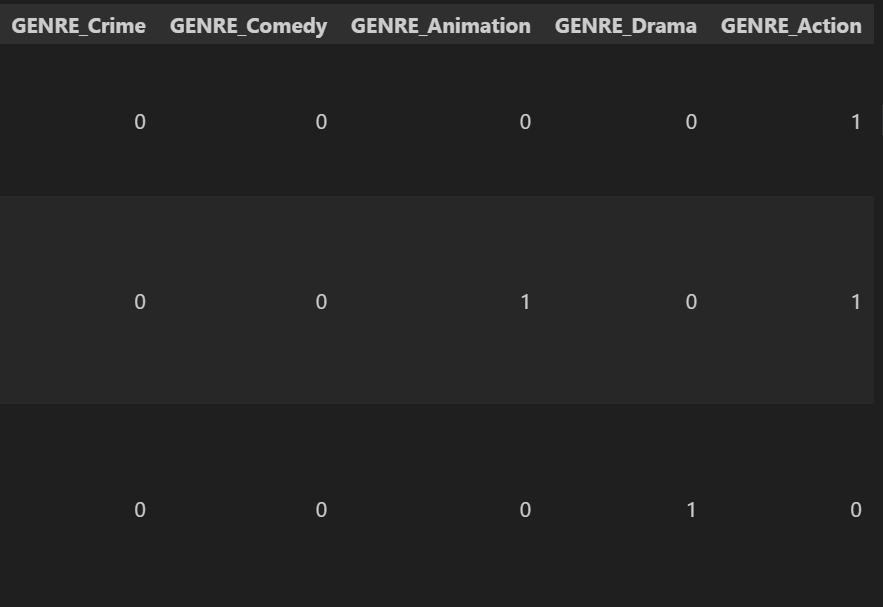

After transformation, remove the original (untransformed) `GENRE` column.

Transform `YEAR` column. Create a new column for `START_YEAR` and `END_YEAR`. For rows with no end year, assign it the same value as the start year.

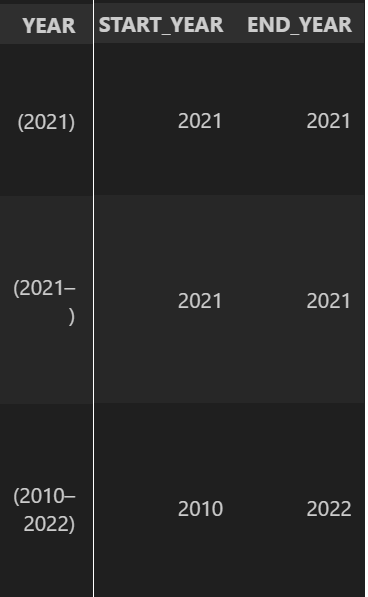

Remove the original (untransformed) `YEAR` column.

In [25]:
unique_years = dropped_movies_df['YEAR'].unique()
unique_years

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [26]:
print('–' == '–')

True


In [27]:
def extract_years(year_str):
    if not isinstance(year_str, str):
        return None, None
    
    try:
        # Remove parentheses and split by en dash
        year_list = year_str.replace('(', '').replace(')', '').split('–')
        
        # Assign start year based on the split
        start_year = int(year_list[0].strip())
        
        # Initialize end_year to None
        end_year = None
        
        # Check if an end year exists and assign it; otherwise, use start year as end year
        if len(year_list) > 1:
            if year_list[1].strip():
                end_year = int(year_list[1].strip())
        if end_year is None:
            end_year = start_year
        
        return start_year, end_year
    except ValueError:
        # Handle exceptions by returning None values for both start and end years
        return None, None
    
# Apply the modified function to the 'YEAR' column and create new columns for 'START_YEAR' and 'END_YEAR'
dropped_movies_df['START_YEAR'], dropped_movies_df['END_YEAR'] = zip(*dropped_movies_df['YEAR'].apply(extract_years))

# Remove the original 'YEAR' column
dropped_movies_df.drop(columns=['YEAR'], inplace=True)

# Display the first few rows to verify the transformation
dropped_movies_df.head()

,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR
0,Blood Red Sky,6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,"21,062",121.0,1,0,0,0,0,0,2021.0,2021.0
1,Masters of the Universe: Revelation,5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...","17,870",25.0,1,1,0,0,0,0,2021.0,2021.0
2,The Walking Dead,8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...","885,805",44.0,0,0,0,0,1,0,2010.0,2022.0
3,Rick and Morty,9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...","414,849",23.0,0,1,1,0,0,0,2013.0,2013.0
5,Outer Banks,7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...","25,858",50.0,1,0,0,1,1,0,2020.0,2020.0


Check and remove rows with impossible values for `START_YEAR` and `END_YEAR`. (The first movie was made in 1888.)

In [28]:
dropped_movies_df['START_YEAR'].describe()
dropped_movies_df['END_YEAR'].describe()

count    5959.000000
mean     2015.972646
std         8.100126
min      1932.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: END_YEAR, dtype: float64

In [29]:
df_filtered = dropped_movies_df[(dropped_movies_df['START_YEAR'] >= 1888) | (dropped_movies_df['END_YEAR'] >= 1888)]

Notice that the `VOTES` column is not of type integer because of the commas. Transform the `VOTES` column by removing the commas and converting the data type to integer.

In [30]:
df_filtered['VOTES'].unique()

array(['21,062', '17,870', '885,805', ..., '5,868', '6,873', '911'],
      dtype=object)

In [31]:
# Transform the VOTES column by removing commas and converting to integer
df_filtered['VOTES'] = df_filtered['VOTES'].str.replace(',', '').astype(int)

# Display the data types of the DataFrame columns to verify the transformation
print(df_filtered.dtypes['VOTES'])
df_filtered.head()

int32


C:\Users\willi\AppData\Local\Temp\ipykernel_29264\3533091395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['VOTES'] = df_filtered['VOTES'].str.replace(',', '').astype(int)


,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR
0,Blood Red Sky,6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,21062,121.0,1,0,0,0,0,0,2021.0,2021.0
1,Masters of the Universe: Revelation,5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...",17870,25.0,1,1,0,0,0,0,2021.0,2021.0
2,The Walking Dead,8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...",885805,44.0,0,0,0,0,1,0,2010.0,2022.0
3,Rick and Morty,9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...",414849,23.0,0,1,1,0,0,0,2013.0,2013.0
5,Outer Banks,7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...",25858,50.0,1,0,0,1,1,0,2020.0,2020.0


Find and remove impossible values for votes (negative votes are not allowed).

In [32]:
df_filtered = df_filtered[df_filtered['VOTES'] >= 0]
df_filtered.shape[0]

5959

Now let's pre-process the numerical columns `["RATING", "VOTES", "RunTime"]`. 

Slice `movies_df` to show the numerical columns of the first five rows.

In [33]:
numerical_slice = df_filtered[["RATING", "VOTES", "RunTime"]].head()
numerical_slice

,RATING,VOTES,RunTime
0,6.1,21062,121.0
1,5.0,17870,25.0
2,8.2,885805,44.0
3,9.2,414849,23.0
5,7.6,25858,50.0


Plot a histogram for each numerical column. Set `bins = 50`.

What can you say about the distribution of the data?

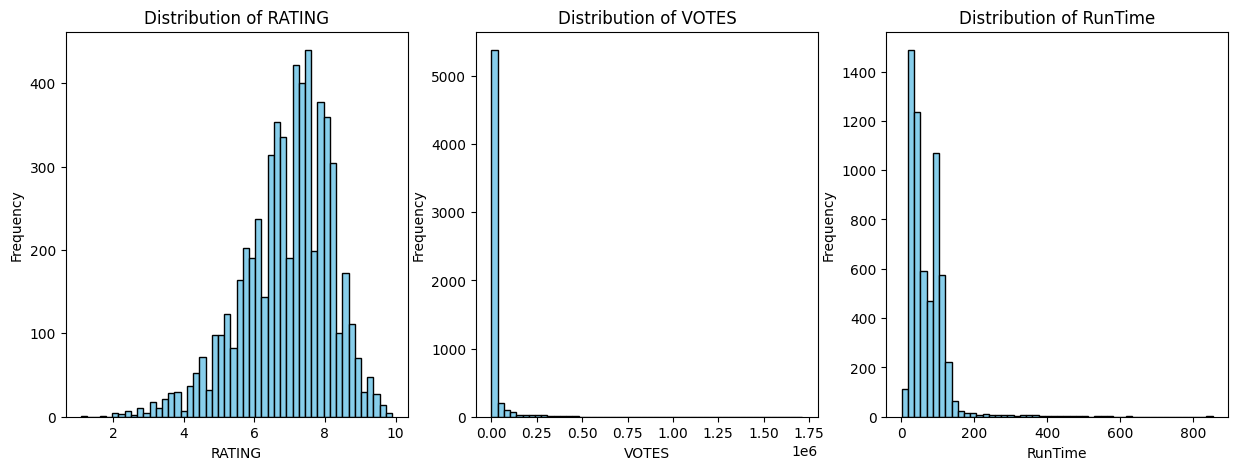

In [34]:
# Plot histograms for each numerical column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, ["RATING", "VOTES", "RunTime"]):
    df_filtered[col].plot(kind='hist', bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)

plt.show()

- Rating appears to be left skewed, with most movies having a rating between 6 and 8.
- Votes is highly right-skewed, indicating that most movies have received a relatively small number of votes.
- RunTime is also highly right-skewed, indicating that most movies have a runtime around less than 200 minutes.

Check the skew of the data with `.skew()`.

In [35]:
# Check the skewness of the numerical columns ["RATING", "VOTES", "RunTime"]
skew_values = df_filtered[["RATING", "VOTES", "RunTime"]].skew()

skew_values

RATING     -0.702474
VOTES      10.383042
RunTime     3.737997
dtype: float64

Transform the columns with skewed data, if any. Use logarithm transform and square transform, if applicable.

In [217]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\willi\Desktop\_77\_Activities\venvs\py-acts\Scripts\python.exe -m pip install --upgrade pip' command.


In [36]:
import numpy as np

# other resource: https://rcompanion.org/handbook/I_12.html#:~:text=For%20right%2Dskewed%20data%E2%80%94tail,log%20(constant%20%E2%80%93%20x).

# Logarithm transformation for the VOTES and RunTime columns, which are highly skewed
df_filtered['VOTES_log'] = np.log1p(df_filtered['VOTES'])
df_filtered['RunTime_log'] = np.log1p(df_filtered['RunTime'])

# Square transformation for the RATING column, which is slightly left-skewed
df_filtered['RATING_square'] = np.square(df_filtered['RATING'])

# Calculate skewness after transformations
skew_values_transformed = df_filtered[["RATING_square", "VOTES_log", "RunTime_log"]].skew()
skew_values_transformed

RATING_square   -0.139982
VOTES_log        0.316542
RunTime_log     -0.244045
dtype: float64

If transformations were done for skewed data, recheck the skew of the data with `.skew()`. Is there an improvement in the skewness of the data? (Skew values closer to 0 are better as they are closer to a normal distribution.)
- yes

In [37]:
df_filtered.head()

,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR,VOTES_log,RunTime_log,RATING_square
0,Blood Red Sky,6.1,\rA woman with a mysterious illness is forced ...,\r Director:\rPeter Thorwarth\r| \r Star...,21062,121.0,1,0,0,0,0,0,2021.0,2021.0,9.955273,4.804021,37.21
1,Masters of the Universe: Revelation,5.0,\rThe war for Eternia begins again in what may...,"\r \r Stars:\rChris Wood, \rSara...",17870,25.0,1,1,0,0,0,0,2021.0,2021.0,9.790935,3.258097,25.00
2,The Walking Dead,8.2,\rSheriff Deputy Rick Grimes wakes up from a c...,"\r \r Stars:\rAndrew Lincoln, \r...",885805,44.0,0,0,0,0,1,0,2010.0,2022.0,13.694253,3.806662,67.24
3,Rick and Morty,9.2,\rAn animated series that follows the exploits...,"\r \r Stars:\rJustin Roiland, \r...",414849,23.0,0,1,1,0,0,0,2013.0,2013.0,12.935672,3.178054,84.64
5,Outer Banks,7.6,\rA group of teenagers from the wrong side of ...,"\r \r Stars:\rChase Stokes, \rMa...",25858,50.0,1,0,0,1,1,0,2020.0,2020.0,10.160414,3.931826,57.76


Again, plot the histogram for each numerical column. Is there an improvement in the distribution of data?

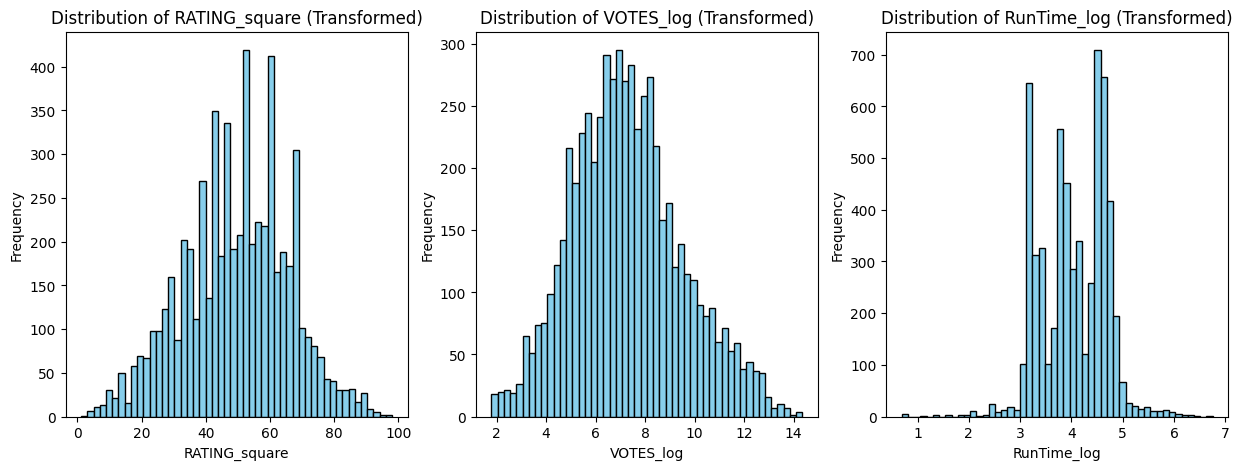

In [38]:
# Plot histograms for each transformed numerical column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, col in zip(axes, ["RATING_square", "VOTES_log", "RunTime_log"]):
    df_filtered[col].plot(kind='hist', bins=50, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {col} (Transformed)')
    ax.set_xlabel(col)

plt.show()

- Yes there has been an improvement in terms of their symmetry. 

Now let's check our data for outliers. Use a boxplot to show the outliers in each numerical column.

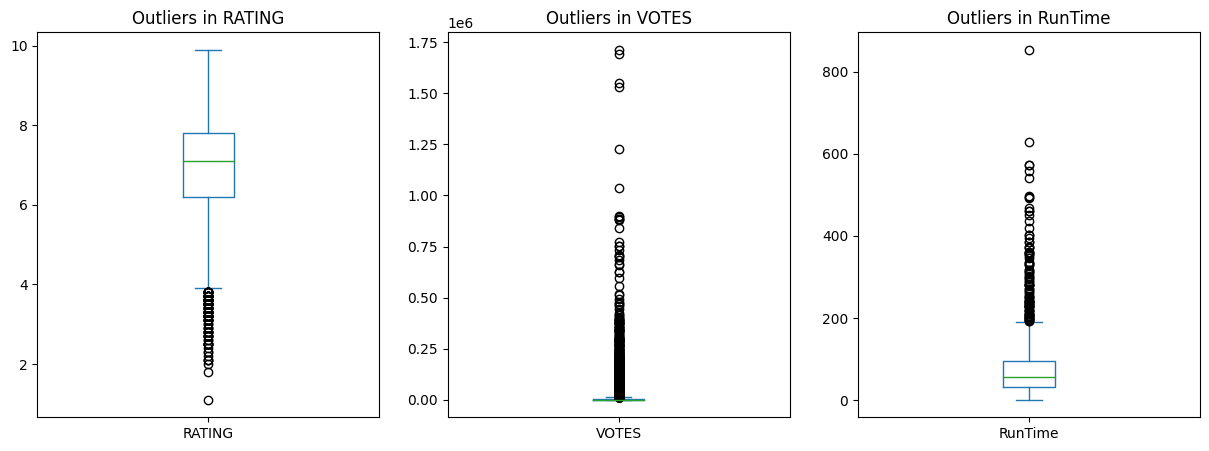

In [39]:
# Plot boxplots for each numerical column to show outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original columns
for ax, col in zip(axes, ["RATING", "VOTES", "RunTime"]):
    df_filtered[col].plot(kind='box', ax=ax)
    ax.set_title(f'Outliers in {col}')

plt.show()

Remove rows in the dataset with outliers in the numerical columns. Use the IQR of the data to calculate the lower and upper values of acceptable datapoints. Show the number of rows before and after removing outliers.

Hint: You may use numpy `percentile()` for IQR calculation. Set `method='midpoint'`.

In [40]:
# Number of rows before removing outliers
rows_before = df_filtered.shape[0]

# Calculate IQR and bounds for each numerical column
outlier_bounds = {}
for col in ["RATING", "VOTES", "RunTime"]:
    Q1 = np.percentile(df_filtered[col].dropna(), 25, interpolation='midpoint')
    Q3 = np.percentile(df_filtered[col].dropna(), 75, interpolation='midpoint')
    
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    
    outlier_bounds[col] = (lower_bound, upper_bound)

# Remove outliers
for col, (lower, upper) in outlier_bounds.items():
    df_filtered = df_filtered[(df_filtered[col] >= lower) & (df_filtered[col] <= upper)]

# Number of rows after removing outliers
rows_after = df_filtered.shape[0]

rows_before, rows_after

(5959, 4819)

In [223]:
df_filtered.head()

,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR,VOTES_log,RunTime_log,RATING_square
6,The Last Letter from Your Lover,6.8,\rA pair of interwoven stories set in the past...,\r Director:\rAugustine Frizzell\r| \r S...,5283,110.0,0,0,0,0,1,0,2021.0,2021.0,8.572439,4.709530,46.24
25,Chernobyl,5.0,\rA story about a heroic fireman who worked as...,\r Director:\rDanila Kozlovskiy\r| \r St...,4681,136.0,0,0,0,0,1,0,2021.0,2021.0,8.451481,4.919981,25.00
63,Le dernier mercenaire,5.4,\rA mysterious former secret service agent mus...,\r Director:\rDavid Charhon\r| \r Stars:...,2606,110.0,1,0,1,0,0,0,2021.0,2021.0,7.865955,4.709530,29.16
64,Resort to Love,5.7,"\rErica, who ends up as the entertainment at h...",\r Director:\rSteven K. Tsuchida\r| \r S...,1591,101.0,0,0,1,0,0,0,2021.0,2021.0,7.372746,4.624973,32.49
73,A Classic Horror Story,5.7,"\rIn this gruesome suspense film, strangers tr...","\r Directors:\rRoberto De Feo, \rPaolo Stri...",8822,95.0,0,0,0,0,1,0,2021.0,2021.0,9.085117,4.564348,32.49


If scaling is necessary for the numerical columns in the dataset, use `StandardScaler()`. If applicable, convert the output of the scaler back into a pandas dataframe.

In [41]:
# StandardScaler object
scaler = StandardScaler()

# Perform scaling on the numerical columns
scaled_values = scaler.fit_transform(df_filtered[["RATING", "VOTES", "RunTime"]])

# Convert the scaled values back to a Pandas DataFrame and assign column names
df_scaled = pd.DataFrame(scaled_values, columns=["RATING", "VOTES", "RunTime"], index=df_filtered.index)

# Replace the original columns in the DataFrame with the scaled ones
df_filtered[["RATING", "VOTES", "RunTime"]] = df_scaled

df_filtered.head()

,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR,VOTES_log,RunTime_log,RATING_square
6,The Last Letter from Your Lover,-0.146473,\rA pair of interwoven stories set in the past...,\r Director:\rAugustine Frizzell\r| \r S...,1.215006,1.471276,0,0,0,0,1,0,2021.0,2021.0,8.572439,4.709530,46.24
25,Chernobyl,-1.720091,\rA story about a heroic fireman who worked as...,\r Director:\rDanila Kozlovskiy\r| \r St...,0.993760,2.240923,0,0,0,0,1,0,2021.0,2021.0,8.451481,4.919981,25.00
63,Le dernier mercenaire,-1.370399,\rA mysterious former secret service agent mus...,\r Director:\rDavid Charhon\r| \r Stars:...,0.231158,1.471276,1,0,1,0,0,0,2021.0,2021.0,7.865955,4.709530,29.16
64,Resort to Love,-1.108129,"\rErica, who ends up as the entertainment at h...",\r Director:\rSteven K. Tsuchida\r| \r S...,-0.141873,1.204860,0,0,1,0,0,0,2021.0,2021.0,7.372746,4.624973,32.49
73,A Classic Horror Story,-1.108129,"\rIn this gruesome suspense film, strangers tr...","\r Directors:\rRoberto De Feo, \rPaolo Stri...",2.515654,1.027249,0,0,0,0,1,0,2021.0,2021.0,9.085117,4.564348,32.49


### Text Preprocessing

Some columns with text data (`["ONE-LINE", "STARS"]`) have implicit missing values. Find the placeholder used for missing values by getting the mode of each column.

In [42]:
# Find the mode of each text column to identify possible placeholders for missing values
text_columns = ["ONE-LINE", "STARS"]
mode_values = {}
for col in text_columns:
    mode_value = df_filtered[col].mode()[0]
    mode_values[col] = mode_value
mode_values

{'ONE-LINE': '\rAdd a Plot\r', 'STARS': '\r'}

Show the number of rows with implicit missing values in each column in `["ONE-LINE", "STARS"]`.

In [43]:
# Count the number of rows with implicit missing values in each text column
implicit_missing_counts = {}
for col, mode_value in mode_values.items():
    implicit_missing_count = df_filtered[df_filtered[col] == mode_value].shape[0]
    implicit_missing_counts[col] = implicit_missing_count

implicit_missing_counts

{'ONE-LINE': 107, 'STARS': 16}

Remove rows with implicit missing values. How many rows remain?

In [44]:
# Remove rows with implicit missing values
for col, mode_value in mode_values.items():
    df_filtered = df_filtered[df_filtered[col] != mode_value]

# Number of rows remaining after removal
remaining_rows = df_filtered.shape[0]
remaining_rows

4697

Create a function `preprocess_text` that transforms the text in `ONE-LINE` column with the following conditions:
- text only contains alphanumeric characters (A-Z and 0-9), spaces, and underscores.
- text is in lowercase
- English stop words are removed (Hint: you may use `stopwords` from nltk)
- text is lemmatized (Hint: you may use `WordNetLemmatizer` from nltk. Lemmatize twice, setting the `pos="n"`, then `pos="v"` for noun and verb lemmatization.)

Here's an example of how the function should work:
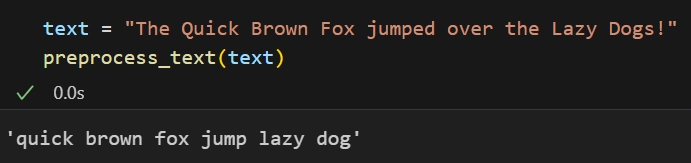


In [45]:
def preprocess_text(text):
    # Remove anything that is not alphanumeric space and underscores
    text = re.sub(r'[^a-zA-Z0-9 _]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove Englisgh Stop Words
    stop_words = set(stopwords.words('English'))
    words = text.split()
    filtered_words = []

    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    
    # Lemmatize the text for nouns
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in filtered_words:
        lemmatized_word = lemmatizer.lemmatize(word, pos='n')
        lemmatized_words.append(lemmatized_word)

    # print(lemmatized_words)
    
    # Lemmatize the text for verbs
    final_lemmatized_words = []
    for word in lemmatized_words:
        lemmatized_word = lemmatizer.lemmatize(word, pos='v')
        final_lemmatized_words.append(lemmatized_word)
    
    # print(final_lemmatized_words)

    processed_text = ' '.join(final_lemmatized_words)
    return processed_text

preprocess_text("The Quick Brown Fox jumped over the Lazy Dogs!")

'quick brown fox jump lazy dog'

```
['quick', 'brown', 'fox', 'jumped', 'lazy', 'dog']
['quick', 'brown', 'fox', 'jump', 'lazy', 'dog']
'quick brown fox jump lazy dog'
 ```

Apply the `preprocess_text` function to the `ONE-LINE` column.

In [46]:
df_filtered['ONE-LINE'] = df_filtered['ONE-LINE'].apply(preprocess_text)
df_filtered.head()

,MOVIES,RATING,ONE-LINE,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,GENRE_Others,START_YEAR,END_YEAR,VOTES_log,RunTime_log,RATING_square
6,The Last Letter from Your Lover,-0.146473,pair interweave story set past present follow ...,\r Director:\rAugustine Frizzell\r| \r S...,1.215006,1.471276,0,0,0,0,1,0,2021.0,2021.0,8.572439,4.709530,46.24
25,Chernobyl,-1.720091,story heroic fireman work one chernobyl liquid...,\r Director:\rDanila Kozlovskiy\r| \r St...,0.993760,2.240923,0,0,0,0,1,0,2021.0,2021.0,8.451481,4.919981,25.00
63,Le dernier mercenaire,-1.370399,mysterious former secret service agent must ur...,\r Director:\rDavid Charhon\r| \r Stars:...,0.231158,1.471276,1,0,1,0,0,0,2021.0,2021.0,7.865955,4.709530,29.16
64,Resort to Love,-1.108129,erica end entertainment exfiancs wed reluctant...,\r Director:\rSteven K. Tsuchida\r| \r S...,-0.141873,1.204860,0,0,1,0,0,0,2021.0,2021.0,7.372746,4.624973,32.49
73,A Classic Horror Story,-1.108129,gruesome suspense film stranger travel souther...,"\r Directors:\rRoberto De Feo, \rPaolo Stri...",2.515654,1.027249,0,0,0,0,1,0,2021.0,2021.0,9.085117,4.564348,32.49


For text vectorization of `ONE-LINE`, use `TfidfVectorizer()` and set `max_features = 1000`. 

Create a new pandas dataframe `one_line_df` with the output from the vectorizer. Make sure to assign feature names to the columns (Hint: You may use `.get_feature_names_out()` on the vectorizer).

In [47]:
# Initialize vecotrizer
vectorizer = TfidfVectorizer(max_features=1000)

matrix = vectorizer.fit_transform(df_filtered['ONE-LINE'])

print(type(matrix))
print(vectorizer.get_feature_names_out())
one_line_df = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

one_line_df.head()

<class 'scipy.sparse._csr.csr_matrix'>
['30' 'aang' 'abandon' 'ability' 'able' 'abuse' 'academy' 'accept'
 'accident' 'accidentally' 'accompany' 'accuse' 'across' 'act' 'action'
 'activist' 'actor' 'adam' 'adora' 'adult' 'adventure' 'affair' 'africa'
 'age' 'agency' 'agent' 'ago' 'agree' 'ahead' 'air' 'alex' 'alien' 'alive'
 'ally' 'almost' 'alone' 'along' 'also' 'always' 'ambition' 'ambitious'
 'america' 'american' 'among' 'ancient' 'angeles' 'anger' 'animal'
 'animate' 'anna' 'another' 'answer' 'anything' 'apart' 'apartment'
 'appear' 'approach' 'archie' 'area' 'arm' 'army' 'around' 'arrest'
 'arrival' 'arrive' 'art' 'artist' 'ash' 'ask' 'aspire' 'attack' 'attempt'
 'attend' 'attention' 'audience' 'ava' 'await' 'awaken' 'away' 'baby'
 'back' 'bad' 'balance' 'band' 'bank' 'bar' 'base' 'battle' 'bear' 'beat'
 'beautiful' 'become' 'begin' 'behind' 'belief' 'believe' 'beloved' 'ben'
 'best' 'beth' 'betrayal' 'better' 'beyond' 'big' 'biggest' 'birth'
 'black' 'blake' 'blood' 'bob' 'body' 

,30,aang,abandon,ability,able,abuse,academy,accept,accident,accidentally,...,writer,wrong,year,yet,york,young,younger,youth,zack,zuko
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenate `movies_df` and `one_line_df` horizontally. Remove the original (untransformed) `ONE-LINE` column.

In [48]:
# Concatenate movies_df and one_line_df horizontally
final_df = pd.concat([df_filtered, one_line_df], axis = 1)

# Remove the original 'ONE-LINE' column
final_df.drop(columns=['ONE-LINE'], inplace=True)

Lastly, using the different techniques taught in the lecture, pre-process the `STARS` column as you see fit. Transform the column to have data represented by numbers.

In [49]:
final_df.head()

,MOVIES,RATING,STARS,VOTES,RunTime,GENRE_Action,GENRE_Animation,GENRE_Comedy,GENRE_Crime,GENRE_Drama,...,writer,wrong,year,yet,york,young,younger,youth,zack,zuko
6,The Last Letter from Your Lover,-0.146473,\r Director:\rAugustine Frizzell\r| \r S...,1.215006,1.471276,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,Chernobyl,-1.720091,\r Director:\rDanila Kozlovskiy\r| \r St...,0.993760,2.240923,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Le dernier mercenaire,-1.370399,\r Director:\rDavid Charhon\r| \r Stars:...,0.231158,1.471276,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,Resort to Love,-1.108129,\r Director:\rSteven K. Tsuchida\r| \r S...,-0.141873,1.204860,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,A Classic Horror Story,-1.108129,"\r Directors:\rRoberto De Feo, \rPaolo Stri...",2.515654,1.027249,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 pre-process the `STARS` column as you see fit. Transform the column to have data represented by numbers.

In [52]:
# Function to count the number of directors
def count_directors(stars_text):
    if pd.isnull(stars_text):
        return 0
    # Extract the director part from the text
    director_match = re.search(r'Director[s]*:(.*?)(\||$)', stars_text)
    if director_match:
        # Extract and clean the director names
        director_text = director_match.group(1).strip()
        # Split by commas to get individual directors and count them
        director_count = len([d.strip() for d in director_text.split(',') if d.strip()])
        return director_count
    return 0

# Apply the function to the 'STARS' column
final_df['Director_Count'] = final_df['STARS'].apply(count_directors)

# Show first few rows to confirm the new column is correctly populated
final_df[['STARS', 'Director_Count']].head()


,STARS,Director_Count
6,\r Director:\rAugustine Frizzell\r| \r S...,1
25,\r Director:\rDanila Kozlovskiy\r| \r St...,1
63,\r Director:\rDavid Charhon\r| \r Stars:...,1
64,\r Director:\rSteven K. Tsuchida\r| \r S...,1
73,"\r Directors:\rRoberto De Feo, \rPaolo Stri...",2


Preprocessed to count the number of directors from the STARS column 